# Data Organization for linArray_app

In [1]:
#load libraries
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import math
import alignment_functions as af
import PyTrack.etDataReader as et

In [ ]:
#dir( af )

In [2]:
from os import listdir
from os.path import isfile, join
mypath = "/home/bonzilla/Documents/ScienceLife/linArray/linArray_data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print( onlyfiles )

['T35_083018_t1_spikingDAT.mat', 'T35_083018_t2_spikingDAT.mat', 'T35_083018_t2-01.plx', 'T35_083018_t2.plx', 'T35_083018_t3.plx', 'T35_083018_t1.plx', 'T35_083018_t3_spikingDAT.mat', 'T35_083018_t1-01.plx']


In [ ]:
#load .mat into python environment @ new machine
chosen_data = onlyfiles[1]
linArrayPath = mypath + chosen_data
linArrayMat = loadmat( linArrayPath )
print(linArrayMat.keys())
multi_dSacctrials = af.getMultiChannelTrialData( linArrayMat, 'SPK', 'delayedSaccIntervals' )
multi_dSacctrials.shape

## Delayed Saccade

In [ ]:
multi_dSacctrials = af.getMultiChannelTrialData( linArrayMat, 'SPK', 'delayedSaccIntervals', timeint = [0., 90.] )
addStrobes = multi_dSacctrials.copy()
addStrobes = af.addEventMarker( linArrayMat, addStrobes, [ 30, 40, 555, 666, 100 ], 'delayedSaccIntervals' )

In [ ]:
# aligning neural data
stimOn = 555 #define the eventmarker for stimulus onset
multi_DSalign = af.addStimOnset( addStrobes, stimOn, 'SPK' )

In [ ]:
stimOnCols = af.getDataTypeNames( multi_DSalign, 'stimOn_' ).values.tolist()
stimOnCols = [item for sublist in stimOnCols for item in sublist]
time_axis_limits_ms = [ -50, 150 ]

In [ ]:
#load behavioral .mat into python environment
path = "/home/bonzilla/Documents/ScienceLife/linArray/bhv_083018/"

bhv_file = "180830_Peanut_delayedSaccadeTask_2016_6_8(1)(1).mat"
bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(1).mat" #holds 22 trials, 14 correct trials Track2 RF mapping == T35_083018_t2_delayedSaccade.pkl
#bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(2).mat" #holds 52 trials, 41 correct trials Track2 RF+180
#bhvPath = path + bhv_file #"180830_Peanut_delayedSaccadeTask_2016_6_8(1)(3).mat" #holds 82 trials, 70 correct trials ???
#bhvPath = path + "180830_Peanut_delayedSaccadeTask_2016_6_8(1).mat" #holds 152 trials, 64 correct trials Track1?
bhvMat = loadmat( bhvPath )

In [ ]:
BHV_df = af.bhvmat2pandasdf( bhvMat )
BHV_plusEV = af.addMultiEventVariables( BHV_df, [ 30, 40, 666, 100 ] )
print( BHV_plusEV.shape )
# select just the correct trials
BHV_correct = BHV_plusEV[
    BHV_plusEV['Trial_Error']==0].reset_index()
print( BHV_correct.shape )

In [ ]:
#merging neural & behavioral data 
column_list = [ 'AnalogEyeData', 'bhv_code30', 'bhv_code40', 'bhv_code666' ]
mergedDS = af.mergeBehavioralColumn( 
    multi_DSalign, BHV_correct, column_list )
mergedDS = af.split_analog_eye( mergedDS, 'AnalogEyeData' )

In [ ]:
merged_bothAlign = af.add_saccade_onsets( mergedDS, 'bhv_code40', 'bhv_code666' )
stimOn_eyealign = af.alignments4trials( merged_bothAlign, 'bhv_code40', 'saccade_onset', 0 )
plt.show( stimOn_eyealign )

In [ ]:
merged_bothAlign = af.adjustSpikes_SaccadeStart( merged_bothAlign, 'saccade_onset', 'SPK' )

In [ ]:
combinedalign = af.eyespike_dualAligned( merged_bothAlign, 'SPK13i', 'bhv_code40', 'saccade_onset', time_axis_limits_ms, 0  )
plt.show( combinedalign )

In [ ]:
merged_bothAlign = merged_bothAlign.assign( neuralDat = chosen_data, BHVdat = bhv_file )
merged_bothAlign

In [ ]:
merged_bothAlign.to_pickle("T35_083018_t1_delayedSaccade.pkl")

In [ ]:
t1 = pd.read_pickle("T35_083018_t1_delayedSaccade.pkl")
t2 = pd.read_pickle("T35_083018_t2_delayedSaccade.pkl")
t3 = pd.read_pickle("T35_083018_t3_delayedSaccade.pkl")

ds_df = pd.concat([t1, t2, t3], ignore_index=True)
ds_df = ds_df.assign( task = 'delayed saccade' )
ds_df.shape

In [ ]:
#ds_df.to_pickle("delayedSaccade.pkl")

## catSearchPHYSIOL

In [3]:
#load .mat into python environment @ new machine
chosen_data = onlyfiles[6]
linArrayPath = mypath + chosen_data
linArrayMat = loadmat( linArrayPath )
print(linArrayMat.keys())

# demonstrate getMultiChannelTrialData()
# generates a pandas dataframe with a row for each trial, start/end features and columns for each channeldata
catSearchtrials = af. getMultiChannelTrialData( linArrayMat, 'SPK', 'catSearchPHYSIOLIntervals' )
print( catSearchtrials.shape )
catSearchtrials.info()

dict_keys(['__header__', '__version__', '__globals__', 'SPK01i', 'SPK02i', 'SPK03i', 'SPK04i', 'SPK05i', 'SPK06i', 'SPK07i', 'SPK08i', 'SPK09i', 'SPK10i', 'SPK11i', 'SPK12i', 'SPK13a', 'SPK13i', 'SPK14i', 'SPK15a', 'SPK16a', 'SPK16i', 'Start', 'Stop', 'Strobed00001', 'Strobed00003', 'Strobed00005', 'Strobed00006', 'Strobed00007', 'Strobed00009', 'Strobed00010', 'Strobed00013', 'Strobed00014', 'Strobed00016', 'Strobed00017', 'Strobed00018', 'Strobed00030', 'Strobed00040', 'Strobed00041', 'Strobed00043', 'Strobed00046', 'Strobed00050', 'Strobed00100', 'Strobed00154', 'Strobed00168', 'Strobed00555', 'Strobed00666', 'Strobed01000', 'Strobed04237', 'Strobed05555', 'catSearchPHYSIOLIntervals', 'delayedSaccIntervals', 'plxDataIntervals'])
(27, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   27 non-null     float64
 1   end     27 non-null     float6

In [23]:
catSearchaddStrobes = catSearchtrials.copy()
af.addEventMarker( linArrayMat, catSearchaddStrobes, [ 1, 14, 40 ], 'catSearchPHYSIOLIntervals' )
catSearchaddStrobes.head()

,start,end,SPK01i,SPK02i,SPK03i,SPK04i,SPK05i,SPK06i,SPK07i,SPK08i,...,SPK12i,SPK13a,SPK13i,SPK14i,SPK15a,SPK16a,SPK16i,Strobed00001,Strobed00014,Strobed00040
0,413.8360,416.1285,[],[],[],[],[],[],[],[],...,"[413.8445, 413.8535, 413.857, 413.86, 413.866,...",[],"[414.4095, 414.6145, 414.7195, 414.773, 414.89...","[413.851, 413.8705, 413.873, 413.8985, 413.913...",[],"[413.845, 414.1215, 414.153, 414.2115, 414.237...",[],[],[414.8655],[414.339]
1,416.6795,418.8625,[],[],[],[],[],[],[],[],...,"[416.69, 416.7135, 416.715, 416.7455, 416.7495...",[417.1595],[],"[416.7845, 416.8405, 416.872, 416.8735, 416.87...",[],"[416.769, 416.8305, 416.875, 416.905, 416.943,...",[],[],[417.5905],[417.097]
2,419.4035,421.7070,[],[],[],[],[],[],[],[],...,"[419.4065, 419.4085, 419.413, 419.416, 419.432...","[419.9885, 420.762, 420.796, 420.7985, 420.811...","[419.986, 419.9895, 419.994, 420.7965, 420.802...","[419.429, 419.4595, 419.5015, 419.678, 419.694...",[],"[419.4215, 419.4685, 419.503, 419.555, 419.586...",[],[],[420.466],[419.9135]
3,431.6395,434.3725,[],[],[],[],[],[],[],[],...,"[431.6395, 431.651, 431.6585, 431.6605, 431.66...","[431.655, 431.673, 431.7135, 431.73, 431.753, ...","[431.656, 431.7285, 431.745, 431.786, 431.9095]","[431.6775, 431.6785, 431.6795, 431.681, 431.68...",[],"[431.6515, 431.689, 431.7875, 431.891, 431.999...",[],[],[433.056],[432.555]
4,434.9135,437.0965,[],[],[],[],[],[],[],[],...,"[434.939, 434.9445, 434.946, 434.9545, 434.957...","[435.389, 435.6455, 436.841, 436.843, 436.845,...","[435.3815, 435.435, 435.475, 435.5205, 436.491...","[435.0135, 435.0155, 435.02, 435.0775, 435.112...",[],"[434.935, 434.976, 435.051, 435.0545, 435.0755...",[],[],[435.831],[435.3135]


In [25]:
# aligning neural data
stimOn = 40 #define the eventmarker for stimulus onset
catSearch_multi_DSalign = af.addStimOnset( catSearchaddStrobes, stimOn, 'SPK' )

In [26]:
stimOnCols = af.getDataTypeNames( catSearch_multi_DSalign, 'stimOn_' ).values.tolist()
stimOnCols = [item for sublist in stimOnCols for item in sublist]
print( stimOnCols )
time_axis_limits_ms = [ -50, 150 ]

['stimOn_SPK01i', 'stimOn_SPK02i', 'stimOn_SPK03i', 'stimOn_SPK04i', 'stimOn_SPK05i', 'stimOn_SPK06i', 'stimOn_SPK07i', 'stimOn_SPK08i', 'stimOn_SPK09i', 'stimOn_SPK10i', 'stimOn_SPK11i', 'stimOn_SPK12i', 'stimOn_SPK13a', 'stimOn_SPK13i', 'stimOn_SPK14i', 'stimOn_SPK15a', 'stimOn_SPK16a', 'stimOn_SPK16i']


In [27]:
#load behavioral .mat into python environment
path = "/home/bonzilla/Documents/ScienceLife/linArray/bhv_083018/"
#bhv_file = "180830_Peanut_CatSearch_Physiol_ML2_2018_8_30(1).mat"
bhv_file = "180830_Peanut_CatSearch_Physiol_ML2_2018_8_30(2).mat"
bhvPath = path + bhv_file 
bhvMat = loadmat( bhvPath )

In [28]:
BHV_df = af.catSearchPHYSIOL2pandasdf( bhvMat )
BHV_plusEV = af.addMultiEventVariables( BHV_df, [ 1, 40, 14 ] )
print( BHV_plusEV.shape )
# select just the correct trials
BHV_correct = BHV_plusEV[
    BHV_plusEV['Trial_Error']==0].reset_index()
print( BHV_correct.shape )

(159, 12)
(27, 13)


In [29]:
#merging neural & behavioral data 
column_list = [ 'AnalogEyeData', 'bhv_code1', 'bhv_code40', 'bhv_code14' ]
mergedDS = af.mergeBehavioralColumn( 
    catSearch_multi_DSalign, BHV_correct, column_list )
mergedDS = af.split_analog_eye( mergedDS, 'AnalogEyeData' )

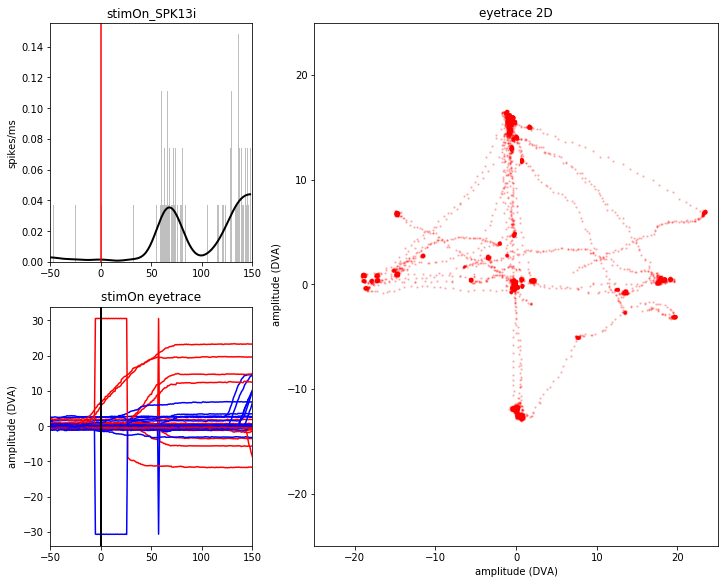

In [30]:
catSearch_stimOn_align = af.eyespike_stimOnAligned( mergedDS, 'SPK13i', 'bhv_code40', time_axis_limits_ms, 0  )
plt.show( catSearch_stimOn_align )

In [32]:
#print( chosen_data )
#T35_083018_t3_catSearchPHYSIOL = mergedDS
#T35_083018_t3_catSearchPHYSIOL.to_pickle("T35_083018_t3_catSearchPHYSIOL.pkl")

T35_083018_t3_spikingDAT.mat
